In [2]:
%pylab inline
from numpy import *
from matplotlib.pyplot import *

from scipy.optimize import leastsq

Populating the interactive namespace from numpy and matplotlib


1548 	5578
Le temp: 	3.096e-07
Le temp de class: 	1.1156e-06
The background is:	0.213731680614
The background of the class is:	6.71279331789
[1600 3060 4160 ...,  700 3500  140]


C:\Users\Stephan\Anaconda\lib\site-packages\IPython\kernel\__main__.py:41: RuntimeWarning: invalid value encountered in sqrt


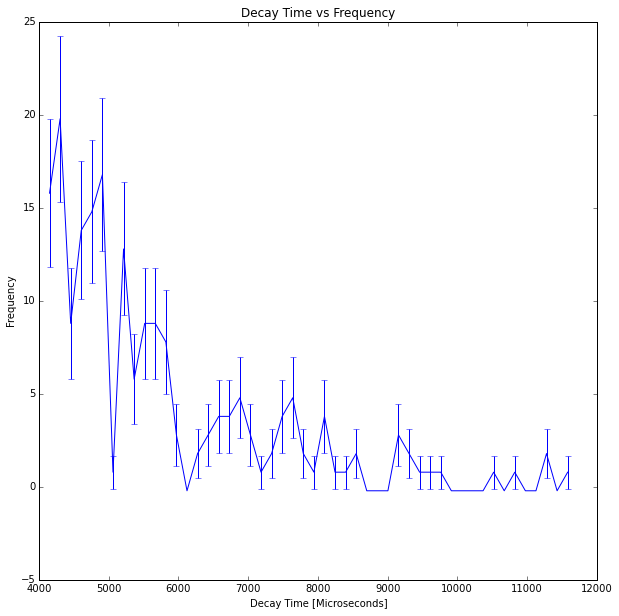

[104  90  73  66  54  57  41  50  27  30  26  25  14  19  16  13  11  13
  14  10   6   9   9   4   6   7   9   3   8   4   3   3   5   5   2   6
   2   3   2   2   1   2   0   1   1   1   7   3   3   1]
50


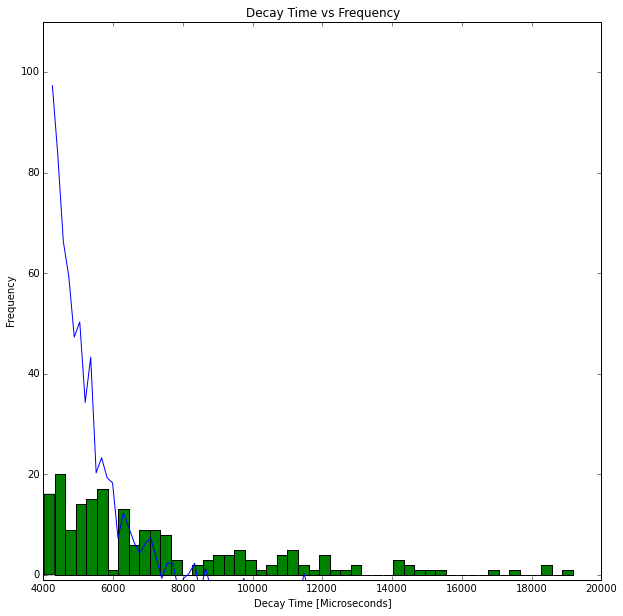

In [6]:
t_dat = recfromtxt ('data3Sifted.txt')[:,0]
c_dat = recfromtxt ('totalDataSifted.data')[:,0]
print len(t_dat), '\t', len(c_dat)
N = 232644
CN = 2217425
R = 2.9674
CR = 2.7136
width = len(t_dat)/50.
CW = len(c_dat)/50.
temp = width * 10*10**-9
ctemp = CW * 10*10**-9

print 'Le temp: \t', temp
print 'Le temp de class: \t', ctemp

bkgrd = temp * R * N
cbkgrd = ctemp * CR * CN

print 'The background is:\t', bkgrd
print 'The background of the class is:\t', cbkgrd

#t_dat = t_dat[where((t_dat<4075) & (t_dat>125))]
t_data = t_dat[where((t_dat>=4000))] 
print t_dat
#t_data = t_dat*10./4096
#print t_data[0:100]


height, bins = histogram(t_data, bins = 50)
#print  bins
derp = []
bern = []
center = (bins[1] - bins[0])/2

for i in range(len(height)):
    bern.append(4000+(i+1) * center)
    derp.append(height[i] - bkgrd)

        
figure(figsize(10,10))
errorbar(bern, derp, sqrt(derp))
xlabel('Decay Time [Microseconds]')
ylabel('Frequency')
title('Decay Time vs Frequency')
#ylim(-1, 110)
show()

c_data = c_dat[where((c_dat>=4000))] 
#print c_data

cheight, cbins = histogram(c_data, bins = 50)
print cheight
cderp = []
cbern = []
ccenter = (cbins[1] - cbins[0])/2

for i in range(len(cheight)):
    cderp.append(cheight[i] - cbkgrd)
    cbern.append(4100+(i+1) * ccenter)
               
print len(cheight)

figure(figsize(10,10))
plot(cbern, cderp)
hist(t_data, bins = 50)
xlabel('Decay Time [Microseconds]')
ylabel('Frequency')
title('Decay Time vs Frequency')
ylim(-1, 110)
show()


In [99]:
n_bin,bin_edges = histogram(t_data, bins = 100)
cn_bin,cbin_edges = histogram(c_data, bins = 100)
#print n_bin,bin_edges

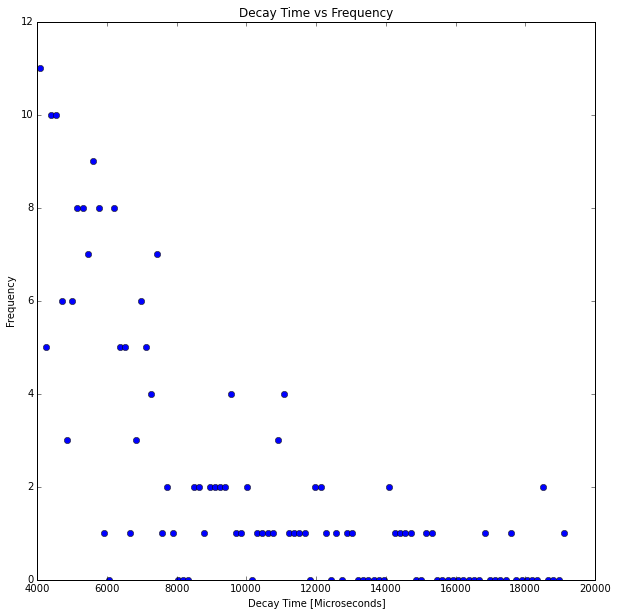

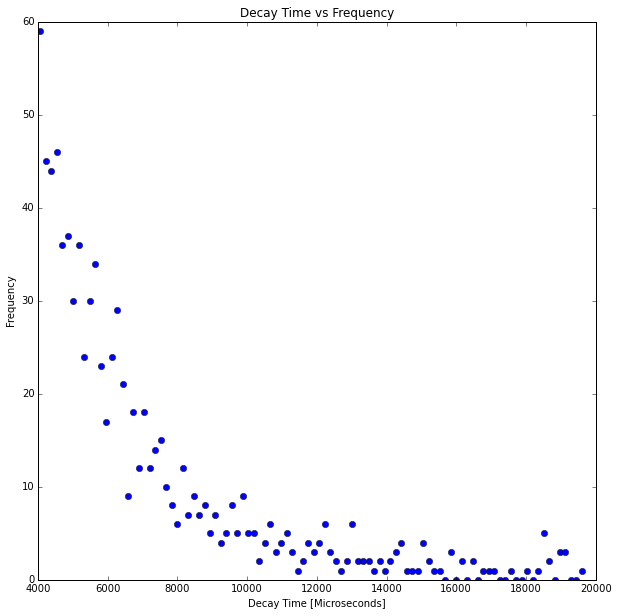

In [100]:
t_bin = bin_edges[:-1] + (bin_edges[1]-bin_edges[0])/2
#print t_bin,n_bin
plot(t_bin, n_bin, 'bo')
xlabel('Decay Time [Microseconds]')
ylabel('Frequency')
title('Decay Time vs Frequency')
show()
c_bin = cbin_edges[:-1] + (cbin_edges[1]-cbin_edges[0])/2
#print t_bin,n_bin
plot(c_bin, cn_bin, 'bo')
xlabel('Decay Time [Microseconds]')
ylabel('Frequency')
title('Decay Time vs Frequency')

In [101]:
fitfxn = lambda p, x : p[0]*exp(-p[1]*x)-p[2] 
errfxn = lambda p, x, y: fitfxn(p,x) -y
parameters, foo = leastsq(errfxn, (300, 3, 5), args=(t_bin, n_bin))

In [102]:
parameters
print parameters
print 1/parameters[1]

[ 300.            3.           -1.97000001]
0.333333333333


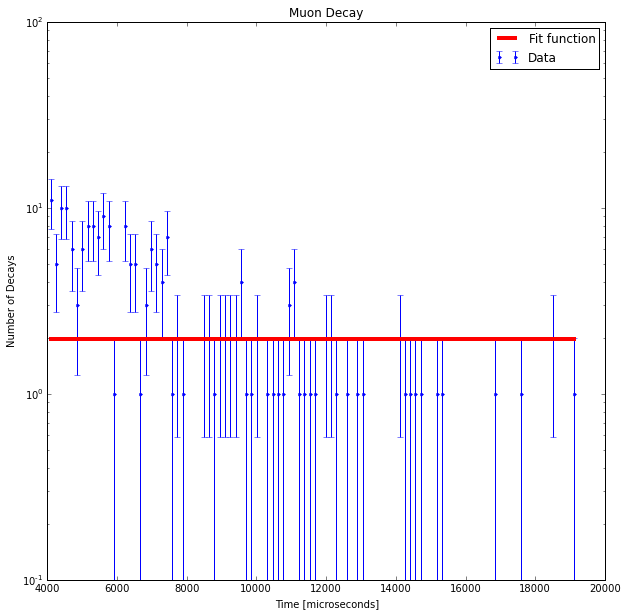

In [103]:
figure(figsize=(10,10))
errbar = sqrt(n_bin)
errorbar (t_bin, n_bin, errbar, fmt = 'b.', label ='Data')
plot(t_bin, fitfxn(parameters, t_bin), 'r', linewidth = 4, label='Fit function')
sqr = sqrt( fitfxn(parameters, t_bin))
#print 2*sqr
legend()
xlabel('Time [microseconds]')
ylabel('Number of Decays')
title('Muon Decay')
yscale('log')

In [22]:
print 'For our trial run, we got 3560732 for counter A and 16555 for counter B'

For our trial run, we got 3560732 for counter A and 16555 for counter B


In [9]:
freq = loadtxt('fgainmuon.txt')
print freq[:,1]

[ 0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11
  0.11  0.11  0.11  0.11]


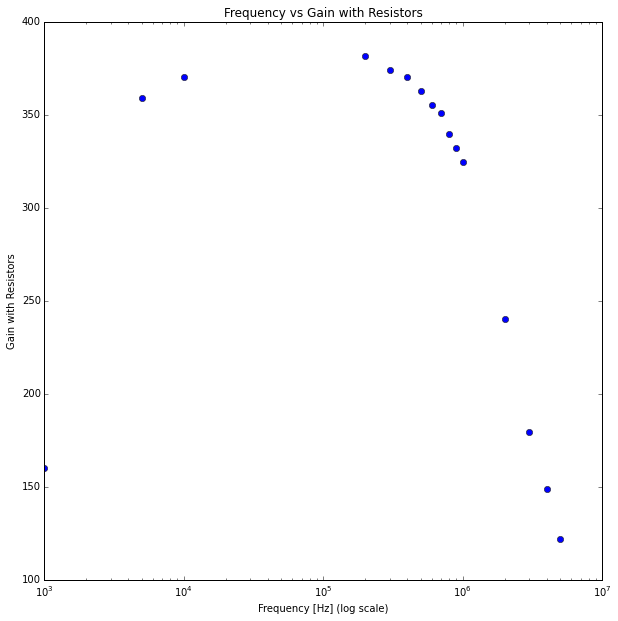

In [10]:
figure(figsize(10,10))
title('Frequency vs Gain with Resistors')
xlabel('Frequency [Hz] (log scale)')
ylabel('Gain with Resistors')
plot(freq[:,0], freq[:,4], 'o', label = 'Data points')
xscale('log')

[ 17.5   15.72  13.82  11.96   9.84   8.1    5.86   3.92   1.8 ]


(0, 20)

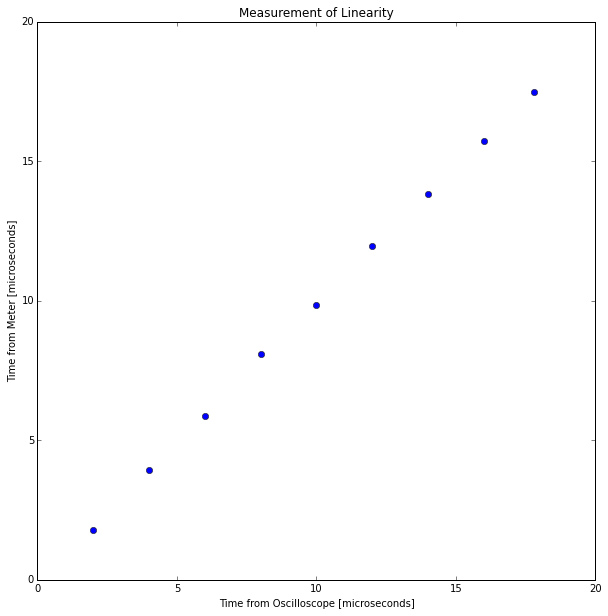

In [11]:
lin = loadtxt('lin.txt')
print lin[:,1]
figure(figsize(10,10))
title('Measurement of Linearity')
xlabel('Time from Oscilloscope [microseconds]')
ylabel('Time from Meter [microseconds]')
plot(lin[:,0], lin[:,1], 'o', label = 'Data points')
xlim(0, 20)
ylim(0,20)
#xscale('linear')